<a href="https://www.kaggle.com/code/sahilr05/messho-ordes-eda-auto-forecasting?scriptVersionId=106587959" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/meesho-orders/meesho ForwardReports.csv
/kaggle/input/meesho-orders/meesho Orders Aug.csv


In [2]:
data = pd.read_csv("/kaggle/input/meesho-orders/meesho Orders Aug.csv")
data.head()

,Reason for Credit Entry,Sub Order No,Order Date,Customer State,Product Name,SKU,Size,Quantity,Supplier Listed Price (Incl. GST + Commission),Supplier Discounted Price (Incl GST and Commision)
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0,1910.0
1,CANCELLED,216649987717_1,2022-08-02,Andhra Pradesh,Beautiful pure lakhnovi long kurta embroidery ...,Kb 201,XXL,1,1500.0,1500.0
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0,1561.0
3,RTO_COMPLETE,916538974169_1,2022-08-02,Assam,FIVESTAR Designer Suit On Havy Gorgette febric...,1101 black,Semi Stitched,1,1749.0,1749.0
4,DELIVERED,528661643961_1,2022-08-02,West Bengal,stlish dress,mk -6114,XL,1,750.0,750.0


In [3]:
data.drop(["Supplier Discounted Price (Incl GST and Commision)"],inplace=True,axis=1)
data.columns = ["status","id","date","state","name","sku","size","quantity","price"]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   status    208 non-null    object 
 1   id        208 non-null    object 
 2   date      208 non-null    object 
 3   state     208 non-null    object 
 4   name      208 non-null    object 
 5   sku       208 non-null    object 
 6   size      208 non-null    object 
 7   quantity  208 non-null    int64  
 8   price     208 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 14.8+ KB


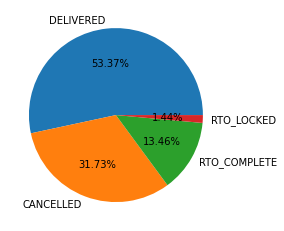

In [5]:
plt.pie(data["status"].value_counts(),autopct="%0.2f%%",labels=data["status"].unique(),radius=1)
plt.show()

<AxesSubplot:xlabel='size', ylabel='price'>

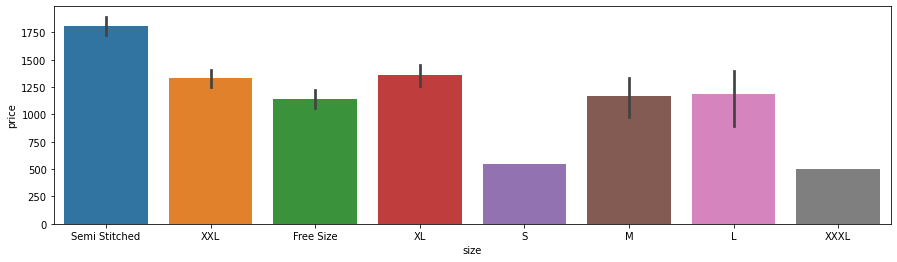

In [6]:
plt.figure(figsize=(15,4))
sns.barplot(data=data,x="size",y="price")

- Semi Stitched Product Price is High

<AxesSubplot:ylabel='price'>

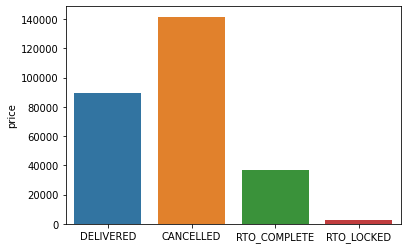

In [7]:
sns.barplot(y = data.groupby("status")["price"].sum(),x=data.status.unique())

- **90K+** Order delivered
- **140K** worth order has cancelled

<AxesSubplot:xlabel='price', ylabel='Count'>

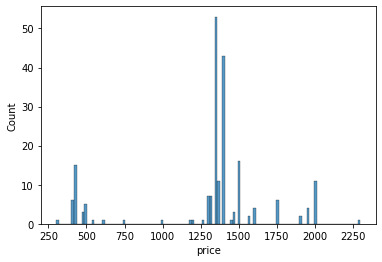

In [8]:
sns.histplot(data["price"])

- seller sale product **range 250-2300**
- **most of product range 1200-1500**

In [9]:
rto = pd.DataFrame(data[data["status"]=="RTO_COMPLETE"])
rto.head()

,status,id,date,state,name,sku,size,quantity,price
3,RTO_COMPLETE,916538974169_1,2022-08-02,Assam,FIVESTAR Designer Suit On Havy Gorgette febric...,1101 black,Semi Stitched,1,1749.0
5,RTO_COMPLETE,261363877240_1,2022-08-02,Uttar Pradesh,Heavy faux georgette with embroidery work with...,Ad 009 a,XXL,1,1500.0
9,RTO_COMPLETE,183404359462_1,2022-08-03,Bihar,top & bottom set,akshar 1090,M,1,1368.0
12,RTO_COMPLETE,493966375185_1,2022-08-04,Odisha,PARTY WEAR LOOK HEAVY EMBROIDERY AND 5mm SEQU...,Hk1408b,Free Size,1,1350.0
37,RTO_COMPLETE,545646779706_1,2022-08-08,Andhra Pradesh,PARTY WEAR LOOK HEAVY EMBROIDERY AND 5mm SEQU...,Hk1408b,Free Size,1,1350.0


In [10]:
rto.shape

(28, 9)

- 28 Product had Return

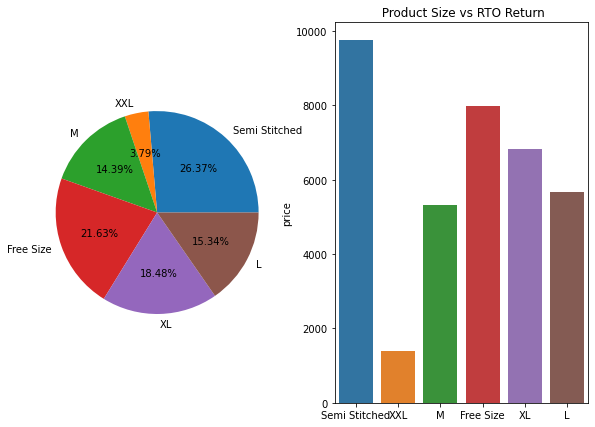

In [11]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.pie(rto.groupby("size")["price"].sum(),autopct="%0.2f%%",labels=rto["size"].unique())
plt.subplot(1,2,2)
sns.barplot(y = rto.groupby("size")["price"].sum(),x = rto["size"].unique())
plt.title(" Product Size vs RTO Return")
plt.show()


> **Which Prodcut has more return?**
- **Semi Stitch, Free Size** Product Have **high Return** 

> **Which product has low return?**
- XXL size Prodict has Less Retun 

**conclusion:-** 
- XXL Prodcut High Demand
- seller **focus on Semi Stitch & free size** Product quality for increas sale

In [12]:
deliverd = pd.DataFrame(data[data["status"]=="DELIVERED"])
deliverd

,status,id,date,state,name,sku,size,quantity,price
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0
4,DELIVERED,528661643961_1,2022-08-02,West Bengal,stlish dress,mk -6114,XL,1,750.0
10,DELIVERED,322259568161_1,2022-08-03,Telangana,PARTY WEAR LOOK HEAVY EMBROIDERY AND 5mm SEQU...,hk 1408,Free Size,1,1350.0
11,DELIVERED,173534645547_1,2022-08-04,Madhya Pradesh,PARTY WEAR LOOK HEAVY EMBROIDERY AND 5mm SEQU...,hk 1408,Free Size,1,1350.0
...,...,...,...,...,...,...,...,...,...
196,DELIVERED,910483967612_1,2022-08-30,Assam,FIVE STAR Hair Straightener Comb for Women & M...,Uk8ndIGZ,Free Size,1,429.0
197,DELIVERED,355129275575_1,2022-08-30,India,Fancy look beautiful embroidery work kurti bot...,Hk 1454,XL,1,1368.0
198,DELIVERED,624159941368_1,2022-08-31,Odisha,Heavy Soft Butterfly Net With Rose Flower Patt...,Ad 021,XXL,1,1300.0
200,DELIVERED,507323371165_1,2022-08-31,Karnataka,FIVESTAR Bridal Wedding Gorgette Lehengha with...,6320,Semi Stitched,1,1949.0


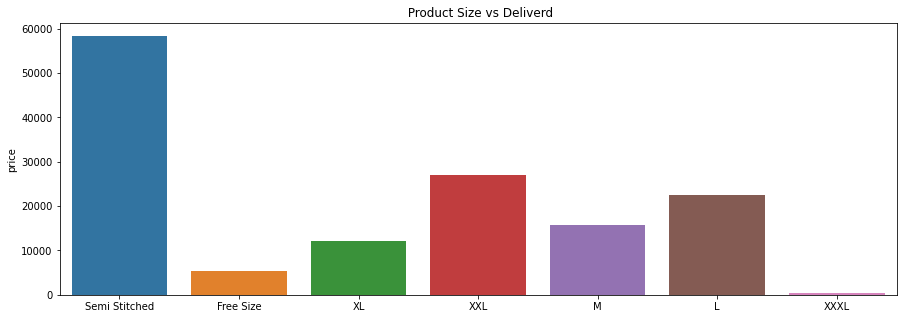

In [13]:
plt.figure(figsize=(15,5))
barplot = sns.barplot(y = deliverd.groupby("size")["price"].sum(),x = deliverd["size"].unique())
plt.title(" Product Size vs Deliverd")
plt.show()

> which prodcut has highest or lowest sell?
- **Semi Stitched,** - product has more sell
- **XXXL Size** Product has lowest sell means **XXXL no demand** 

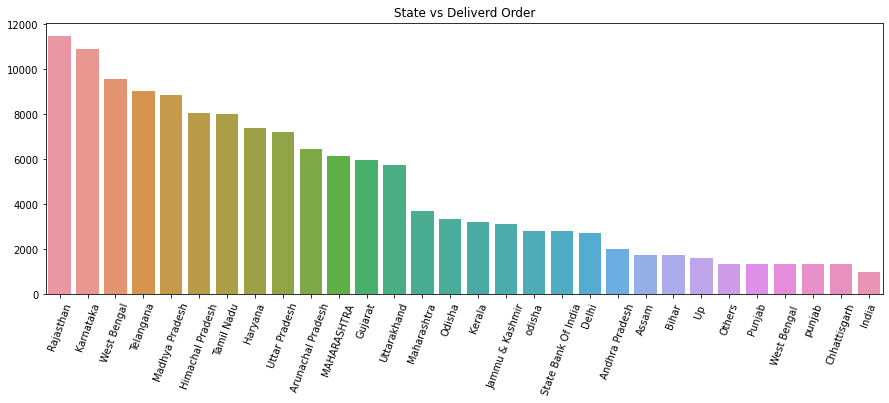

In [14]:
plt.figure(figsize=(15,5))
barplot = sns.barplot(y = sorted(deliverd.groupby("state")["price"].sum(),reverse=True),x = deliverd["state"].unique())
plt.title("State vs Deliverd Order")
plt.xticks(rotation=70)
plt.show()

> Which state have more order?
- most of order recived from Rajasthan & karnataka.

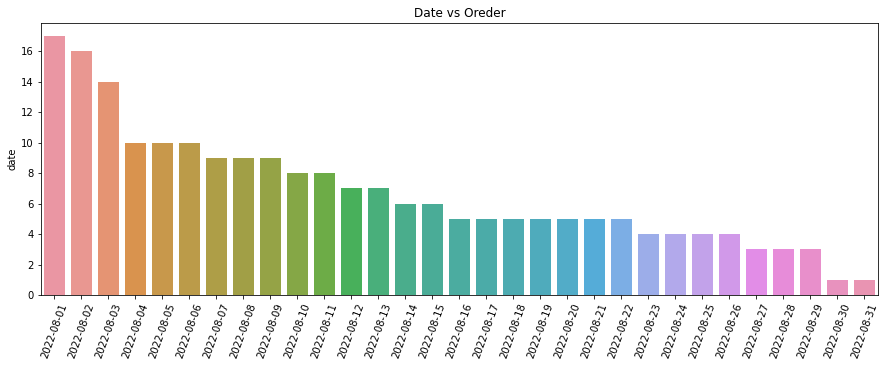

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["date"].unique() ,y = data["date"].value_counts())
plt.title("Date vs Oreder")
plt.xticks(rotation=70)
plt.show()

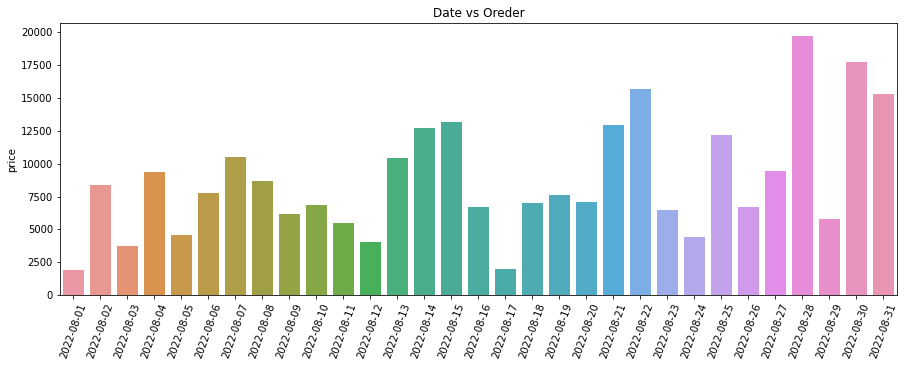

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["date"].unique() ,y = data.groupby("date")["price"].sum())
plt.title("Date vs Oreder")
plt.xticks(rotation=70)
plt.show()

In [17]:
# Convert Data object to DateTime
# extract day from date

data["date"] = pd.to_datetime(data["date"])
deliverd["date"] = pd.to_datetime(deliverd["date"])
data["day_name"] = data["date"].dt.day_name()
data["day"] = data["date"].dt.day
deliverd["day_name"] = deliverd["date"].dt.day_name()
deliverd["day"] = deliverd["date"].dt.day

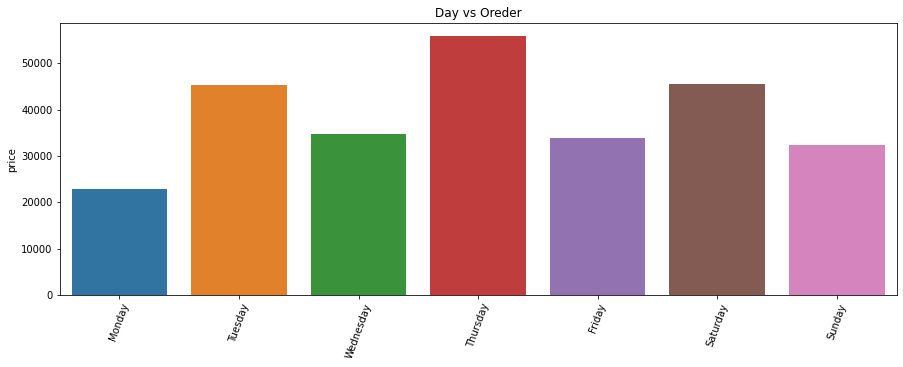

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["day_name"].unique() ,y = data.groupby("day_name")["price"].sum())
plt.title("Day vs Oreder")
plt.xticks(rotation=70)
plt.show()

In [19]:
data.head(3)

,status,id,date,state,name,sku,size,quantity,price,day_name,day
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0,Monday,1
1,CANCELLED,216649987717_1,2022-08-02,Andhra Pradesh,Beautiful pure lakhnovi long kurta embroidery ...,Kb 201,XXL,1,1500.0,Tuesday,2
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0,Tuesday,2


Text(0.5, 1.0, 'Day vs Order Count')

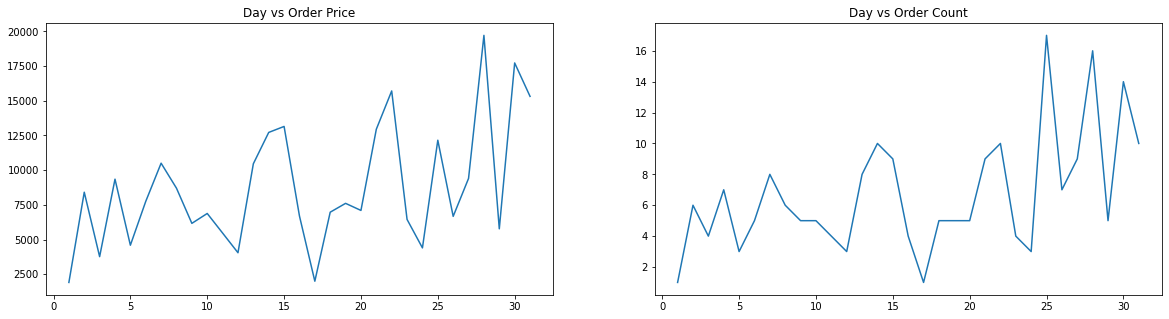

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(data["day"].unique(), data.groupby("day")["price"].sum())
plt.title("Day vs Order Price")
plt.subplot(1,2,2)
plt.plot(data["day"].unique(), data.groupby("day")["price"].count())
plt.title("Day vs Order Count")

In [21]:
pred_df = data.groupby("date")["price"].count().to_frame()
pred_df.reset_index(inplace=True)
pred_df.columns = ["ds","y"]
pred_df.head(3)

,ds,y
0,2022-08-01,1
1,2022-08-02,6
2,2022-08-03,4


# **Prophet: Automatic Forecasting Procedure**

In [22]:
!pip install pystan==2.19
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 254.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=8980095 sha256=c7af82b4420de220972dfc13917788bffaed08dc44e8217c6410c81f478bceda
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [23]:
from fbprophet import Prophet
m = Prophet()
m.fit(pred_df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=10)
predict = m.predict(future)


Initial log joint probability = -2.83522
Iteration  1. Log joint probability =    24.4345. Improved by 27.2697.
Iteration  2. Log joint probability =     30.941. Improved by 6.50651.
Iteration  3. Log joint probability =    37.7583. Improved by 6.81726.
Iteration  4. Log joint probability =    40.7916. Improved by 3.03327.
Iteration  5. Log joint probability =    40.8018. Improved by 0.0102072.
Iteration  6. Log joint probability =    41.2969. Improved by 0.495079.
Iteration  7. Log joint probability =    41.4163. Improved by 0.119477.
Iteration  8. Log joint probability =    41.5275. Improved by 0.111164.
Iteration  9. Log joint probability =    41.5516. Improved by 0.0240696.
Iteration 10. Log joint probability =    41.5709. Improved by 0.0193804.
Iteration 11. Log joint probability =    41.6165. Improved by 0.0455072.
Iteration 12. Log joint probability =    41.6782. Improved by 0.0617883.
Iteration 13. Log joint probability =     41.693. Improved by 0.0147157.
Iteration 14. Log jo

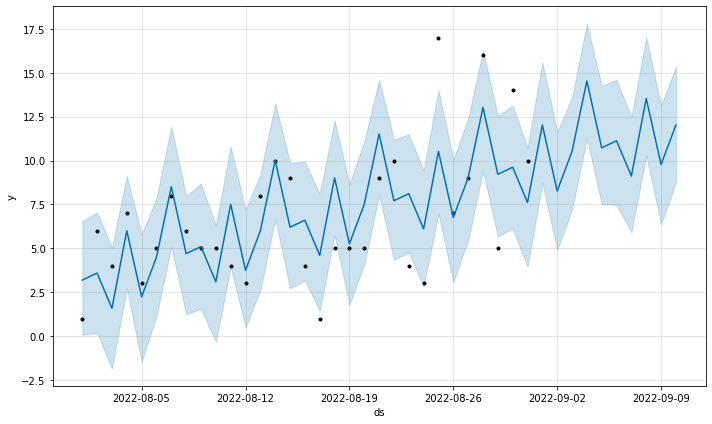

In [24]:
fig1 = m.plot(predict)

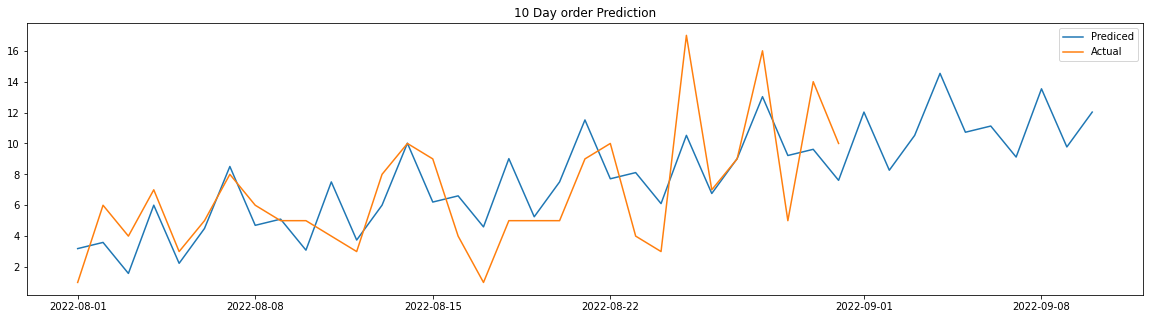

In [25]:
plt.figure(figsize=(20,5))
plt.plot(predict["ds"],predict["yhat"],label="Prediced")
plt.plot(pred_df["ds"],pred_df["y"],label="Actual")
plt.title("10 Day order Prediction")
plt.legend()

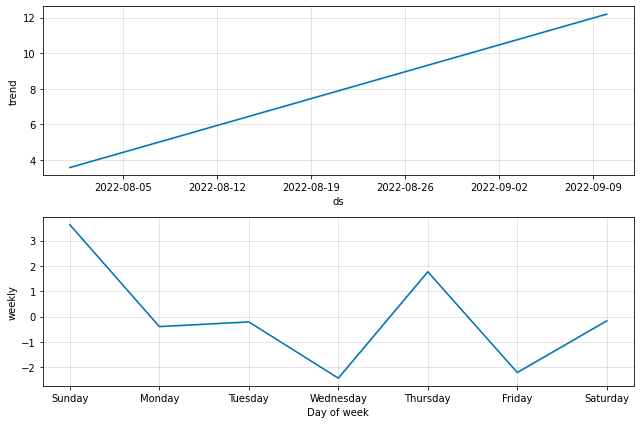

In [26]:
fig2 = m.plot_components(predict)